In [38]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

# Load CSV table into dataframe
orig = pd.read_csv("../games.csv")

# Select two GameWeight and AvgRating columns where GameWeight is not 0.0
df = orig.loc[orig["GameWeight"] != 0.0, ["GameWeight", "AvgRating"]]

x = df["GameWeight"].values.reshape(-1, 1)
y = df["AvgRating"].values

model = LinearRegression()
model.fit(x, y)
slope = model.coef_[0] # The slope is the first element of the coef_ array
intercept = model.intercept_ # The intercept is a scalar value
print(f"The slope is {slope:.2f} and the intercept is {intercept:.2f}")
df["CorrectedAvgRating"] = df["AvgRating"] - slope * df["GameWeight"]




The slope is 0.59 and the intercept is 5.22


The slope is 0.00 and the intercept is 5.22


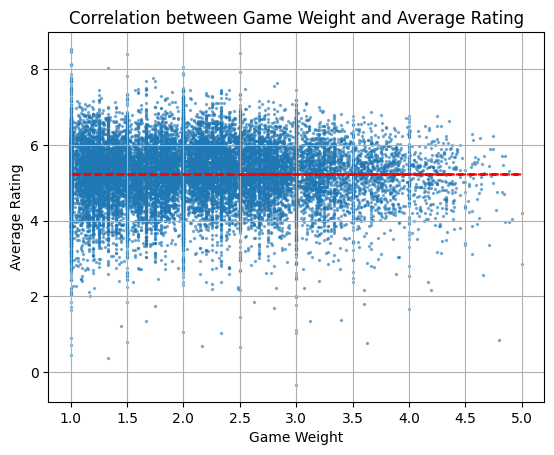

The correlation coefficient is -0.00 and the p-value is 1.0000


In [39]:
x = df["GameWeight"]
y = df["CorrectedAvgRating"]

# Plot scatter plot
plt.scatter(x, y, s=2, alpha=0.5)
plt.xlabel("Game Weight")
plt.ylabel("Average Rating")
plt.title("Correlation between Game Weight and Average Rating")

# Fit a linear model
m, b = np.polyfit(x, y, 1)
y_pred = np.polyval([m, b], x)
print(f"The slope is {m:.2f} and the intercept is {b:.2f}")
plt.plot(x, y_pred, color="red", linestyle="--")

plt.grid(True)
plt.show()

# Calculate correlation coefficient and p-value
corr, p = pearsonr(x, y)
print(f"The correlation coefficient is {corr:.2f} and the p-value is {p:.4f}")

# Print the original data (orig dataframe) to CSV, ordered by CorrectedAvgRating
orig["CorrectedAvgRating"] = orig["AvgRating"] - slope * orig["GameWeight"]
orig.sort_values(by=["CorrectedAvgRating"], ascending=False, inplace=True)
orig.to_csv("../games_corrected.csv", index=False)

